In [7]:
import pandas as pd
import missingno as msno
import scipy.stats as stats
import numpy as np
from random import sample
import os
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [9]:
PREFIX_DATA_DIR = '/home/gernot/Nextcloud/Research/Papers/20_Political_Prediction/Data_Analysis/data/' 

In [10]:
CHES2019 = pd.read_stata(PREFIX_DATA_DIR + 'CHES2019_experts.dta')
CHES2019_means = pd.read_stata(PREFIX_DATA_DIR + 'CHES2019_means.dta')
EVS = pd.read_csv(PREFIX_DATA_DIR + 'voter_table.csv')
#EES = pd.read_stata('/home/gernot/pCloud/University_Graz/Research/Papers/20_Political_Prediction/Data_Analysis/data/EES_Voter_Survey.dta')

In [19]:
relevant_cols = ['econ_interven', 
               'environment', 
               'redistribution', 
               'civlib_laworder', 
               'immigrate_policy', 
               'sociallifestyle',
               'lrgen',
               'lrecon',
               'galtan']

relevant_cols_independent = ['econ_interven', 
               'environment', 
               'redistribution', 
               'civlib_laworder', 
               'immigrate_policy', 
               'sociallifestyle']

relevant_cols_dependent = ['lrgen',
               'lrecon',
               'galtan']

relevant_cols_factor = ['econ_interven', 
               'environment', 
               'redistribution', 
               'civlib_laworder', 
               'immigrate_policy', 
               'sociallifestyle',
               'lrgen_factor',
               'lrecon_factor',
               'galtan_factor']

relevant_cols_factor_independent = ['econ_interven', 
               'environment', 
               'redistribution', 
               'civlib_laworder', 
               'immigrate_policy', 
               'sociallifestyle']

relevant_cols_factor_dependent = [
               'lrgen_factor',
               'lrecon_factor',
               'galtan_factor']

relevant_cols_EVS = ['econ_interven', 
               'environment', 
               'redistribution', 
               'civlib_laworder', 
               'immigrate_policy', 
               'sociallifestyle',
               'lrgen_selfdescription',
               'respid',
               'hCountry',
               'countrycode']

relevant_cols_EVS_independent = ['econ_interven', 
               'environment', 
               'redistribution', 
               'civlib_laworder', 
               'immigrate_policy', 
               'sociallifestyle']

# CHES2019

In [20]:
CHES2019.head()

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,...,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1.0,1,GERB,2010.0,7.0,9.0,1.0,NaN,5.0,NaN,...,1948.0,9.0,3.0,,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,BSP,2003.0,5.0,6.0,4.0,NaN,3.0,NaN,...,1948.0,9.0,3.0,,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3,DPS,2004.0,7.0,9.0,2.0,NaN,5.0,NaN,...,1948.0,9.0,3.0,,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4,Volya,2017.0,3.0,6.0,4.0,NaN,7.0,NaN,...,1948.0,9.0,3.0,,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,5,NFSB,2014.0,3.0,6.0,4.0,NaN,7.0,NaN,...,1948.0,9.0,3.0,,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
CHES2019[relevant_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   econ_interven     3432 non-null   float64
 1   environment       3262 non-null   float64
 2   redistribution    3396 non-null   float64
 3   civlib_laworder   3405 non-null   float64
 4   immigrate_policy  3438 non-null   float64
 5   sociallifestyle   3461 non-null   float64
 6   lrgen             3610 non-null   float64
 7   lrecon            3554 non-null   float64
 8   galtan            3596 non-null   float64
dtypes: float64(9)
memory usage: 268.9 KB


In [26]:
#relevant_cols_ext = relevant_cols
#relevant_cols_ext.append('party_id')
#CHES2019[relevant_cols_ext].to_csv(PREFIX_DATA_DIR + 'CHES2019_incl_party_id_without_imputation.csv')

In [6]:
CHES2019[relevant_cols].isnull().any()

econ_interven       True
environment         True
redistribution      True
civlib_laworder     True
immigrate_policy    True
sociallifestyle     True
lrgen               True
lrecon              True
galtan              True
dtype: bool

In [7]:
CHES2019[relevant_cols].isnull().sum()

econ_interven       391
environment         561
redistribution      427
civlib_laworder     418
immigrate_policy    385
sociallifestyle     362
lrgen               213
lrecon              269
galtan              227
dtype: int64

In [8]:
# Obtain an overview of missing values and respective removal
data_base = CHES2019[relevant_cols]
for i in range(0, 7):
    print(str(i) + ': ' + str(len(data_base.dropna(subset = data_base.iloc[:,:-3].columns.values,thresh = i))))

0: 3823
1: 3649
2: 3599
3: 3535
4: 3425
5: 3274
6: 2912


### Examine impact of NANs for lrgen / lrecon / galtan
1) check statistical values of all independent variables
2) remove all rows where values of respective cols are nan
3) check statistical values of all independent variables again

In [9]:
data_base.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,3432.000000,3262.000000,3396.000000,3405.000000,3438.000000,3461.000000,3610.000000,3554.000000,3596.000000
mean,4.548951,5.188228,4.409894,5.151542,5.681792,4.473851,5.299446,4.952448,5.076752
std,2.632320,2.647456,2.533628,2.930842,2.936724,3.266881,2.582166,2.450809,3.106851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,4.000000,5.000000,6.000000,4.000000,5.000000,5.000000,5.000000
75%,6.000000,7.000000,6.000000,8.000000,8.000000,7.000000,7.000000,7.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data_base.describe().round(2).to_latex('/home/gernot/pCloud/University_Graz/Research/Papers/20_Political_Prediction/Data_Analysis/descriptive_statistics/CHES2019_descr_stat.tex')

/tmp/ipykernel_3652/2436550970.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data_base.describe().round(2).to_latex('/home/gernot/pCloud/University_Graz/Research/Papers/20_Political_Prediction/Data_Analysis/descriptive_statistics/CHES2019_descr_stat.tex')


In [11]:
data_base['galtan'].value_counts()

5.0     381
2.0     374
3.0     353
10.0    349
9.0     330
1.0     325
8.0     318
4.0     315
6.0     308
7.0     301
0.0     242
Name: galtan, dtype: int64

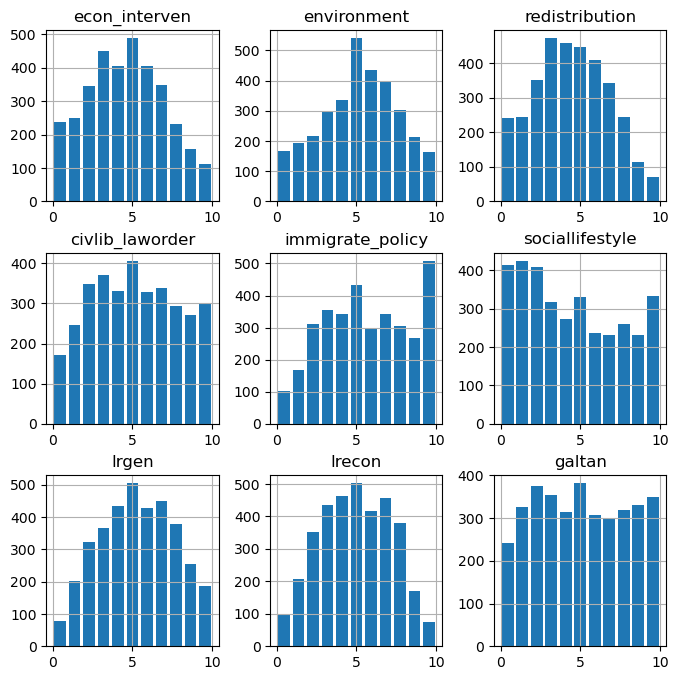

In [12]:
data_base.hist(bins = 11, figsize = (8, 8), rwidth = 0.8)
plt.savefig('/home/gernot/pCloud/University_Graz/Research/Papers/20_Political_Prediction/Data_Analysis/descriptive_statistics/CHES2019_histogram.png', dpi = 300)

In [13]:
data_base[data_base['lrgen'].isnull()==True].describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,47.000000,41.000000,47.000000,55.000000,46.000000,57.000000,0.0,47.000000,58.000000
mean,5.021277,5.268293,4.489362,5.181818,6.695652,5.280702,NaN,5.127660,5.482759
std,2.641552,2.356103,2.412579,2.667298,2.850883,3.315302,NaN,2.675306,3.185721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,3.000000,4.000000,2.500000,3.500000,5.000000,2.000000,NaN,3.000000,2.250000
50%,5.000000,5.000000,4.000000,5.000000,7.000000,6.000000,NaN,5.000000,5.500000
75%,7.000000,7.000000,6.000000,7.000000,9.000000,8.000000,NaN,7.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,10.000000,10.000000


In [14]:
data_base[data_base['lrecon'].isnull()==True].describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,57.000000,55.000000,56.000000,84.000000,84.000000,104.000000,103.000000,0.0,106.000000
mean,4.701754,5.654545,4.982143,5.797619,7.119048,5.951923,6.165049,NaN,6.330189
std,2.283207,2.729931,2.347076,3.033070,2.825890,3.465166,2.769218,NaN,3.134210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,3.000000,4.000000,3.750000,3.000000,6.000000,3.000000,4.000000,NaN,5.000000
50%,5.000000,5.000000,5.000000,6.000000,8.000000,7.000000,6.000000,NaN,7.000000
75%,6.000000,7.000000,6.250000,8.000000,10.000000,9.000000,9.000000,NaN,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,10.000000


In [15]:
data_base[data_base['galtan'].isnull()==True].describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,55.000000,41.000000,61.000000,49.000000,47.000000,51.000000,72.000000,64.000000,0.0
mean,4.781818,5.292683,4.688525,5.530612,6.361702,5.117647,4.958333,4.796875,NaN
std,2.416693,2.193672,2.356134,2.151570,2.335227,2.732377,2.145664,2.247960,NaN
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,4.000000,3.000000,5.000000,5.000000,3.500000,3.750000,3.000000,NaN
50%,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,NaN
75%,6.000000,7.000000,6.000000,7.000000,8.000000,7.000000,6.000000,6.000000,NaN
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN


In [16]:
data_base[data_base['lrgen'].isnull()==False].describe()-data_base.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,-47.000000,-41.000000,-47.000000,-55.000000,-46.000000,-57.000000,0.0,-47.000000,-58.000000
mean,-0.006558,-0.001019,-0.001115,-0.000497,-0.013749,-0.013511,0.0,-0.002348,-0.006656
std,-0.000334,0.003813,0.001983,0.004490,-0.000851,-0.002020,0.0,-0.002818,-0.001290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [17]:
# check normality of full dataset
temp_data = data_base
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
# check normality of reduced dataset
temp_data = data_base[data_base['lrgen'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

ShapiroResult(statistic=0.9679872989654541, pvalue=5.364263785152602e-27)
ShapiroResult(statistic=0.9676464796066284, pvalue=1.733194277058232e-26)
ShapiroResult(statistic=0.9693026542663574, pvalue=2.3322003979982523e-26)
ShapiroResult(statistic=0.9532848596572876, pvalue=1.103582073317513e-31)
ShapiroResult(statistic=0.943869411945343, pvalue=2.6788976721700004e-34)
ShapiroResult(statistic=0.9216215014457703, pvalue=3.643120970924017e-39)
ShapiroResult(statistic=0.9681272506713867, pvalue=1.3855629206127649e-27)
ShapiroResult(statistic=0.9697623252868652, pvalue=9.59137301984945e-27)
ShapiroResult(statistic=0.9407732486724854, pvalue=1.0417778506132954e-35)
end
ShapiroResult(statistic=0.9679254293441772, pvalue=7.580672113402043e-27)
ShapiroResult(statistic=0.9674981832504272, pvalue=2.1961003214322506e-26)
ShapiroResult(statistic=0.9692113995552063, pvalue=3.2005519816695073e-26)
ShapiroResult(statistic=0.9528189897537231, pvalue=1.37333933647105e-31)
ShapiroResult(statistic=0.94401

In [18]:
data_base[data_base['lrecon'].isnull()==False].describe()-data_base.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,-57.000000,-55.000000,-56.000000,-84.000000,-84.000000,-104.000000,-103.000000,0.0,-106.000000
mean,-0.002581,-0.007997,-0.009595,-0.016342,-0.035996,-0.045791,-0.025423,0.0,-0.038070
std,0.005718,-0.001715,0.002236,-0.004009,-0.005908,-0.016508,-0.009676,0.0,-0.008308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [19]:
# check normality of full dataset
temp_data = data_base
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
# check normality of reduced dataset
temp_data = data_base[data_base['lrecon'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

ShapiroResult(statistic=0.9679872989654541, pvalue=5.364263785152602e-27)
ShapiroResult(statistic=0.9676464796066284, pvalue=1.733194277058232e-26)
ShapiroResult(statistic=0.9693026542663574, pvalue=2.3322003979982523e-26)
ShapiroResult(statistic=0.9532848596572876, pvalue=1.103582073317513e-31)
ShapiroResult(statistic=0.943869411945343, pvalue=2.6788976721700004e-34)
ShapiroResult(statistic=0.9216215014457703, pvalue=3.643120970924017e-39)
ShapiroResult(statistic=0.9681272506713867, pvalue=1.3855629206127649e-27)
ShapiroResult(statistic=0.9697623252868652, pvalue=9.59137301984945e-27)
ShapiroResult(statistic=0.9407732486724854, pvalue=1.0417778506132954e-35)
end
ShapiroResult(statistic=0.9677314162254333, pvalue=6.980761113536952e-27)
ShapiroResult(statistic=0.9675484895706177, pvalue=2.5963541698970013e-26)
ShapiroResult(statistic=0.969002366065979, pvalue=2.868969091301828e-26)
ShapiroResult(statistic=0.9534191489219666, pvalue=2.6689707380900314e-31)
ShapiroResult(statistic=0.94466

In [20]:
data_base[data_base['galtan'].isnull()==False].describe()-data_base.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan
count,-55.000000,-41.000000,-61.000000,-49.000000,-47.000000,-51.000000,-72.000000,-64.000000,0.0
mean,-0.003793,-0.001330,-0.005096,-0.005535,-0.009424,-0.009629,0.006942,0.002853,0.0
std,0.003525,0.005533,0.003175,0.009724,0.006645,0.006707,0.007906,0.003767,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [21]:
# check normality of full dataset
temp_data = data_base
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
# check normality of reduced dataset
temp_data = data_base[data_base['galtan'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

ShapiroResult(statistic=0.9679872989654541, pvalue=5.364263785152602e-27)
ShapiroResult(statistic=0.9676464796066284, pvalue=1.733194277058232e-26)
ShapiroResult(statistic=0.9693026542663574, pvalue=2.3322003979982523e-26)
ShapiroResult(statistic=0.9532848596572876, pvalue=1.103582073317513e-31)
ShapiroResult(statistic=0.943869411945343, pvalue=2.6788976721700004e-34)
ShapiroResult(statistic=0.9216215014457703, pvalue=3.643120970924017e-39)
ShapiroResult(statistic=0.9681272506713867, pvalue=1.3855629206127649e-27)
ShapiroResult(statistic=0.9697623252868652, pvalue=9.59137301984945e-27)
ShapiroResult(statistic=0.9407732486724854, pvalue=1.0417778506132954e-35)
end
ShapiroResult(statistic=0.9678253531455994, pvalue=7.443132211609617e-27)
ShapiroResult(statistic=0.9674240350723267, pvalue=2.062375763896854e-26)
ShapiroResult(statistic=0.9690567255020142, pvalue=3.142465010100415e-26)
ShapiroResult(statistic=0.9525306224822998, pvalue=1.0778191162788463e-31)
ShapiroResult(statistic=0.94338

## assess impact of removing NANs
assess after removing...
1) lrgen.nans
2) lrecon.nans
3) galtan.nans

In [22]:
data_lrgen = data_base[data_base['lrgen'].isna() == False].drop(['lrecon', 'galtan'], axis=1)
data_lrecon = data_base[data_base['lrecon'].isna() == False].drop(['lrgen', 'galtan'], axis=1)
data_galtan = data_base[data_base['galtan'].isna() == False].drop(['lrecon', 'lrgen'], axis=1)

### lrgen

In [23]:
data_lrgen.shape

(3610, 7)

In [24]:
data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,3385.000000,3221.000000,3349.000000,3350.000000,3392.000000,3404.000000,3610.000000
mean,4.542393,5.187209,4.408779,5.151045,5.668042,4.460341,5.299446
std,2.631987,2.651269,2.535611,2.935332,2.935873,3.264861,2.582166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,6.000000,7.000000,6.000000,8.000000,8.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [25]:
data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 1).describe()-data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,0.0,0.0,0.0,0.0,0.0,0.0,-37.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.006739
std,0.0,0.0,0.0,0.0,0.0,0.0,0.004573
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [26]:
data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 2).describe()-data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,-3.000000,-4.000000,-3.000000,-1.000000,-5.000000,-16.000000,-69.000000
mean,-0.000702,0.001787,0.000665,-0.001448,-0.002262,-0.002844,0.003858
std,0.000126,0.000064,0.000764,-0.000758,-0.000677,-0.003086,0.006065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 3).describe()-data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,-23.000000,-21.000000,-24.000000,-12.000000,-27.000000,-35.000000,-124.000000
mean,0.004008,-0.002209,0.008364,-0.002153,-0.007716,-0.013027,0.003193
std,-0.002012,-0.004722,-0.003007,-0.002613,-0.000139,-0.002896,0.001400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 4).describe()-data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,-64.000000,-52.000000,-72.000000,-66.000000,-97.000000,-94.000000,-225.000000
mean,0.008947,0.003703,0.008676,-0.022847,-0.041335,-0.051579,-0.014069
std,0.002098,-0.010085,-0.001418,-0.011639,-0.011048,-0.017529,-0.009790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 5).describe()-data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,-182.000000,-121.000000,-186.000000,-158.000000,-203.000000,-199.000000,-376.000000
mean,0.009590,0.007630,0.007282,-0.050481,-0.077262,-0.091854,-0.031666
std,0.005258,-0.011176,-0.005435,-0.011097,-0.022497,-0.025655,-0.014426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 6).describe()-data_lrgen.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen
count,-503.000000,-339.000000,-467.000000,-468.000000,-510.000000,-522.000000,-728.000000
mean,0.035678,0.002590,0.031887,-0.087894,-0.114607,-0.183450,-0.034005
std,0.017562,-0.023673,0.009664,-0.023787,-0.033895,-0.044015,-0.028885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
testA = data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 6)
testB = data_lrgen

# check normality of full dataset
temp_data = testB
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
temp_data = testA
# check normality of reduced dataset
temp_data = data_base[data_base['lrecon'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))
    
for i in testA.columns:
    tA = testA[testA[i].isna()==False][i]
    tB = testB[testB[i].isna()==False][i]
    #tB = sample(list(testB[testB[i].isna()==False][i]), len(tA))
    #print(len(tA), len(tB))
    #print(stats.wilcoxon(tA, tB))
    print(i + ': ' + str(stats.mannwhitneyu(tA, tB)))

ShapiroResult(statistic=0.9679254293441772, pvalue=7.580672113402043e-27)
ShapiroResult(statistic=0.9674981832504272, pvalue=2.1961003214322506e-26)
ShapiroResult(statistic=0.9692113995552063, pvalue=3.2005519816695073e-26)
ShapiroResult(statistic=0.9528189897537231, pvalue=1.37333933647105e-31)
ShapiroResult(statistic=0.9440121650695801, pvalue=4.557773174624545e-34)
ShapiroResult(statistic=0.9213557243347168, pvalue=5.930714089263459e-39)
ShapiroResult(statistic=0.9681272506713867, pvalue=1.3855629206127649e-27)
end
ShapiroResult(statistic=0.9677314162254333, pvalue=6.980761113536952e-27)
ShapiroResult(statistic=0.9675484895706177, pvalue=2.5963541698970013e-26)
ShapiroResult(statistic=0.969002366065979, pvalue=2.868969091301828e-26)
ShapiroResult(statistic=0.9534191489219666, pvalue=2.6689707380900314e-31)
ShapiroResult(statistic=0.9446612596511841, pvalue=9.579043771778318e-34)
ShapiroResult(statistic=0.9218084812164307, pvalue=1.1914541594220221e-38)
ShapiroResult(statistic=0.9685

### lrecon

In [32]:
data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,3375.000000,3207.000000,3340.000000,3321.000000,3354.000000,3357.000000,3554.000000
mean,4.546370,5.180231,4.400299,5.135200,5.645796,4.428061,4.952448
std,2.638038,2.645741,2.535864,2.926833,2.930816,3.250373,2.450809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,6.000000,7.000000,6.000000,8.000000,8.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 1).describe()-data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,0.0,0.0,0.0,0.0,0.0,0.0,-31.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,-0.000418
std,0.0,0.0,0.0,0.0,0.0,0.0,0.003018
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [34]:
data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 2).describe()-data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,-3.000000,-3.000000,-4.00000,0.0,-3.000000,-7.000000,-51.000000
mean,-0.000700,0.001417,0.00078,0.0,-0.002108,0.002088,0.003590
std,0.000132,-0.000268,0.00114,0.0,0.000057,-0.000495,0.004458
min,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000


In [35]:
data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 3).describe()-data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,-25.000000,-15.000000,-26.000000,-7.000000,-20.000000,-17.000000,-96.000000
mean,0.004674,-0.002912,0.012193,0.001191,-0.006024,-0.005606,0.014007
std,-0.001344,-0.002678,-0.001874,-0.002372,0.001379,-0.000892,0.005881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 4).describe()-data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,-68.000000,-46.000000,-74.000000,-52.000000,-76.000000,-64.000000,-186.000000
mean,0.009420,0.004837,0.011519,-0.009780,-0.027736,-0.031766,0.014595
std,0.003735,-0.006772,-0.000413,-0.008285,-0.006284,-0.009447,0.008322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 5).describe()-data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,-181.000000,-115.000000,-184.000000,-138.000000,-176.000000,-162.000000,-330.000000
mean,0.010611,0.008644,0.011931,-0.032153,-0.059893,-0.063429,0.028942
std,0.005767,-0.007907,-0.003745,-0.007307,-0.014987,-0.014682,0.008849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 6).describe()-data_lrecon.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrecon
count,-497.000000,-329.000000,-462.000000,-443.000000,-476.000000,-479.000000,-676.000000
mean,0.029029,0.005662,0.032293,-0.067097,-0.092287,-0.151827,0.056239
std,0.016510,-0.016295,0.011185,-0.019706,-0.026284,-0.030291,0.003698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
testA = data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 6)
testB = data_lrecon

# check normality of full dataset
temp_data = testB
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
temp_data = testA
# check normality of reduced dataset
temp_data = data_base[data_base['lrecon'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))
    
for i in testA.columns:
    tA = testA[testA[i].isna()==False][i]
    tB = testB[testB[i].isna()==False][i]
    #tB = sample(list(testB[testB[i].isna()==False][i]), len(tA))
    #print(len(tA), len(tB))
    #print(stats.wilcoxon(tA, tB))
    print(i + ': ' + str(stats.mannwhitneyu(tA, tB)))

ShapiroResult(statistic=0.9677314162254333, pvalue=6.980761113536952e-27)
ShapiroResult(statistic=0.9675484895706177, pvalue=2.5963541698970013e-26)
ShapiroResult(statistic=0.969002366065979, pvalue=2.868969091301828e-26)
ShapiroResult(statistic=0.9534191489219666, pvalue=2.6689707380900314e-31)
ShapiroResult(statistic=0.9446612596511841, pvalue=9.579043771778318e-34)
ShapiroResult(statistic=0.9218084812164307, pvalue=1.1914541594220221e-38)
ShapiroResult(statistic=0.9697623252868652, pvalue=9.59137301984945e-27)
end
ShapiroResult(statistic=0.9677314162254333, pvalue=6.980761113536952e-27)
ShapiroResult(statistic=0.9675484895706177, pvalue=2.5963541698970013e-26)
ShapiroResult(statistic=0.969002366065979, pvalue=2.868969091301828e-26)
ShapiroResult(statistic=0.9534191489219666, pvalue=2.6689707380900314e-31)
ShapiroResult(statistic=0.9446612596511841, pvalue=9.579043771778318e-34)
ShapiroResult(statistic=0.9218084812164307, pvalue=1.1914541594220221e-38)
ShapiroResult(statistic=0.96859

### galtan

In [40]:
data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,3377.000000,3221.000000,3335.000000,3356.000000,3391.000000,3410.000000,3596.000000
mean,4.545158,5.186898,4.404798,5.146007,5.672368,4.464223,5.076752
std,2.635845,2.652989,2.536803,2.940567,2.943369,3.273588,3.106851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,6.000000,7.000000,6.000000,8.000000,8.000000,7.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [41]:
data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 1).describe()-data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,0.0,0.0,0.0,0.0,0.0,0.0,-36.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000214
std,0.0,0.0,0.0,0.0,0.0,0.0,-0.001195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [42]:
data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 2).describe()-data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,-3.000000,-1.000000,-1.000000,-1.000000,-8.000000,-15.000000,-65.000000
mean,-0.000701,-0.000563,0.000121,-0.001447,-0.006095,-0.003251,-0.004818
std,0.000130,0.000220,0.000371,-0.000757,-0.002184,-0.002873,-0.005735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 3).describe()-data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,-21.000000,-18.000000,-20.000000,-13.000000,-27.000000,-32.000000,-116.000000
mean,0.003113,-0.004569,0.009079,-0.000629,-0.011548,-0.012476,-0.022154
std,-0.001034,-0.004552,-0.001824,-0.003497,-0.002784,-0.003103,-0.006182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 4).describe()-data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,-52.000000,-46.000000,-58.000000,-66.000000,-95.000000,-93.000000,-209.000000
mean,0.007624,0.002708,0.010216,-0.021995,-0.041603,-0.049993,-0.054018
std,0.004328,-0.009867,0.001643,-0.011933,-0.013142,-0.017766,-0.015734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 5).describe()-data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,-165.000000,-111.000000,-165.000000,-154.000000,-196.000000,-195.000000,-353.000000
mean,0.008079,0.004420,0.007505,-0.048256,-0.077689,-0.092528,-0.099262
std,0.006779,-0.010634,-0.002836,-0.012266,-0.024721,-0.025170,-0.017629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 6).describe()-data_galtan.describe()

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,galtan
count,-488.000000,-332.000000,-446.000000,-467.000000,-502.000000,-521.000000,-707.000000
mean,0.028050,0.001402,0.028224,-0.081625,-0.115774,-0.182464,-0.163287
std,0.017536,-0.022360,0.013337,-0.025802,-0.036398,-0.043029,-0.024174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
testA = data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 6)
testB = data_galtan

# check normality of full dataset
temp_data = testB
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
temp_data = testA
# check normality of reduced dataset
temp_data = data_base[data_base['lrecon'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))
    
for i in testA.columns:
    tA = testA[testA[i].isna()==False][i]
    tB = testB[testB[i].isna()==False][i]
    #tB = sample(list(testB[testB[i].isna()==False][i]), len(tA))
    #print(len(tA), len(tB))
    #print(stats.wilcoxon(tA, tB))
    print(i + ': ' + str(stats.mannwhitneyu(tA, tB)))

ShapiroResult(statistic=0.9678253531455994, pvalue=7.443132211609617e-27)
ShapiroResult(statistic=0.9674240350723267, pvalue=2.062375763896854e-26)
ShapiroResult(statistic=0.9690567255020142, pvalue=3.142465010100415e-26)
ShapiroResult(statistic=0.9525306224822998, pvalue=1.0778191162788463e-31)
ShapiroResult(statistic=0.9433884620666504, pvalue=3.2420439548703415e-34)
ShapiroResult(statistic=0.9203833341598511, pvalue=3.6663881306256665e-39)
ShapiroResult(statistic=0.9407732486724854, pvalue=1.0417778506132954e-35)
end
ShapiroResult(statistic=0.9677314162254333, pvalue=6.980761113536952e-27)
ShapiroResult(statistic=0.9675484895706177, pvalue=2.5963541698970013e-26)
ShapiroResult(statistic=0.969002366065979, pvalue=2.868969091301828e-26)
ShapiroResult(statistic=0.9534191489219666, pvalue=2.6689707380900314e-31)
ShapiroResult(statistic=0.9446612596511841, pvalue=9.579043771778318e-34)
ShapiroResult(statistic=0.9218084812164307, pvalue=1.1914541594220221e-38)
ShapiroResult(statistic=0.96

# Missingno: check relevant NANs

<AxesSubplot: >

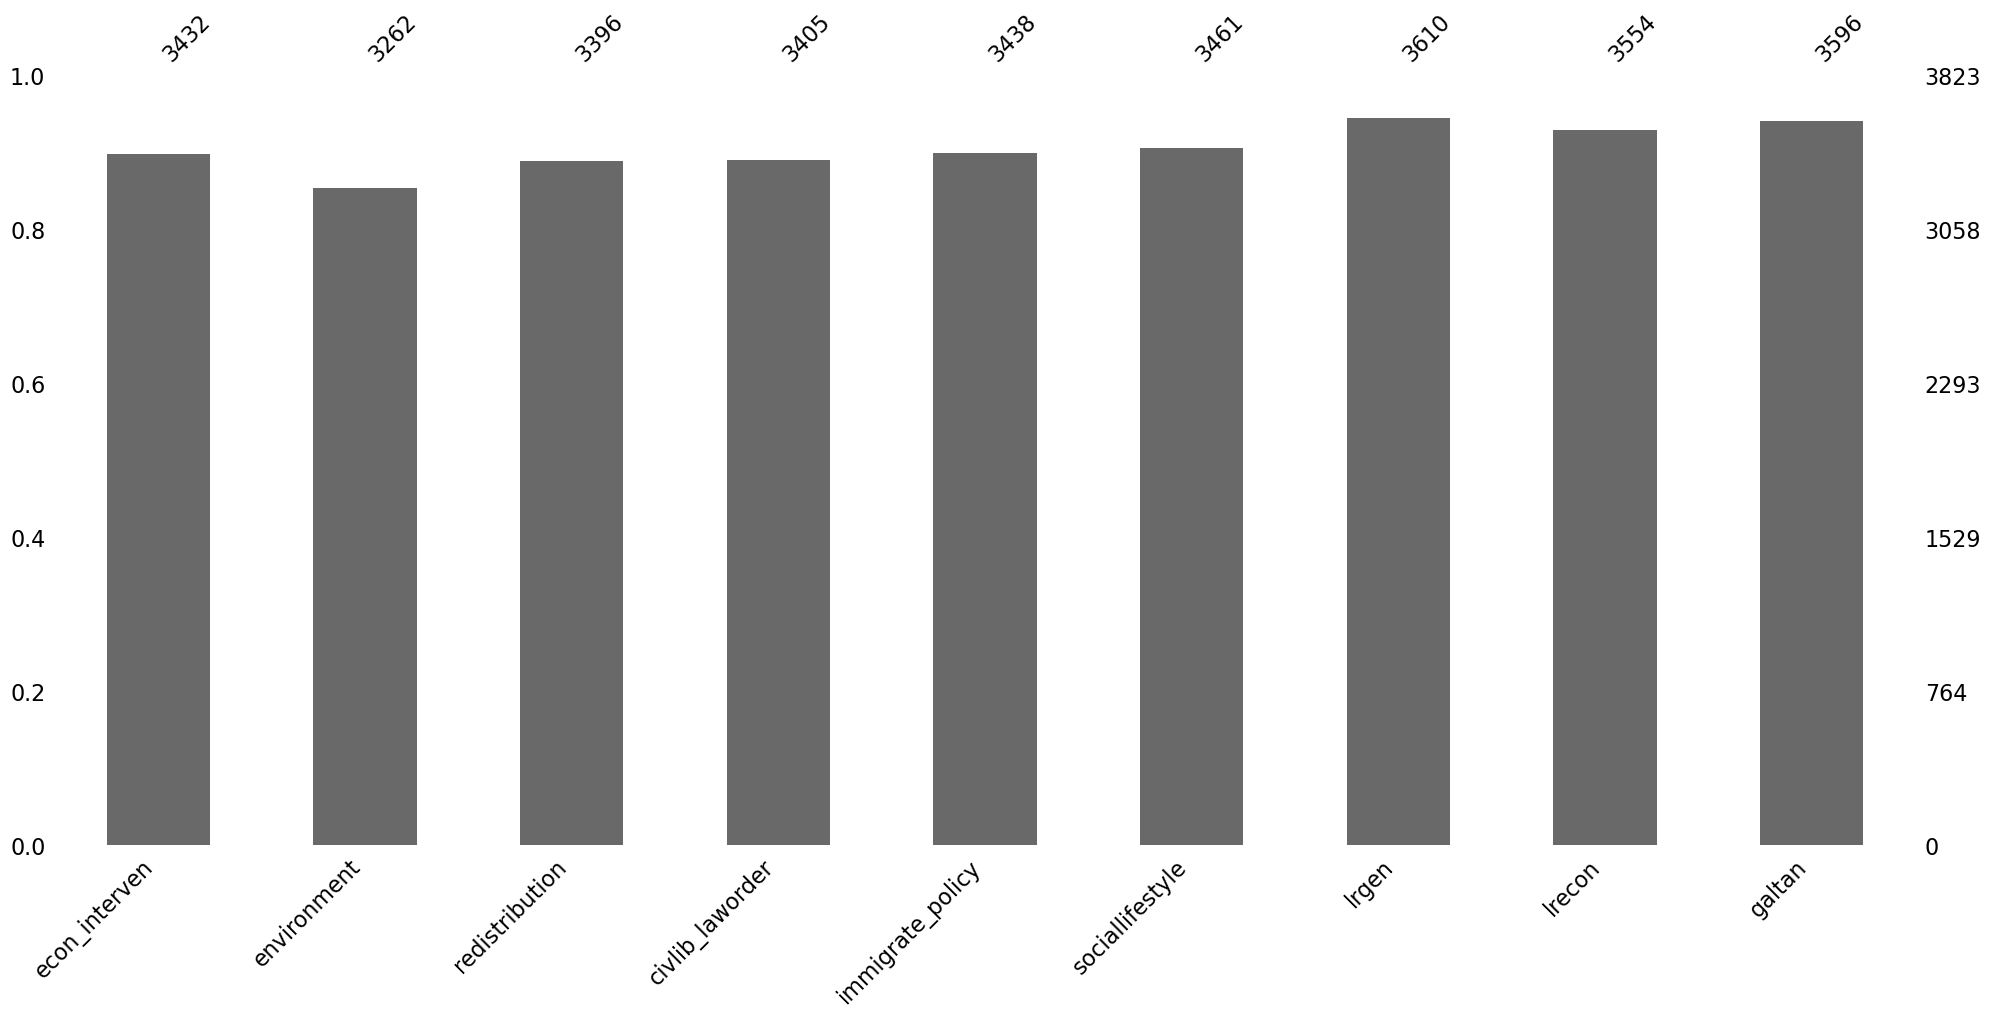

In [48]:
msno.bar(CHES2019[relevant_cols])

<AxesSubplot: >

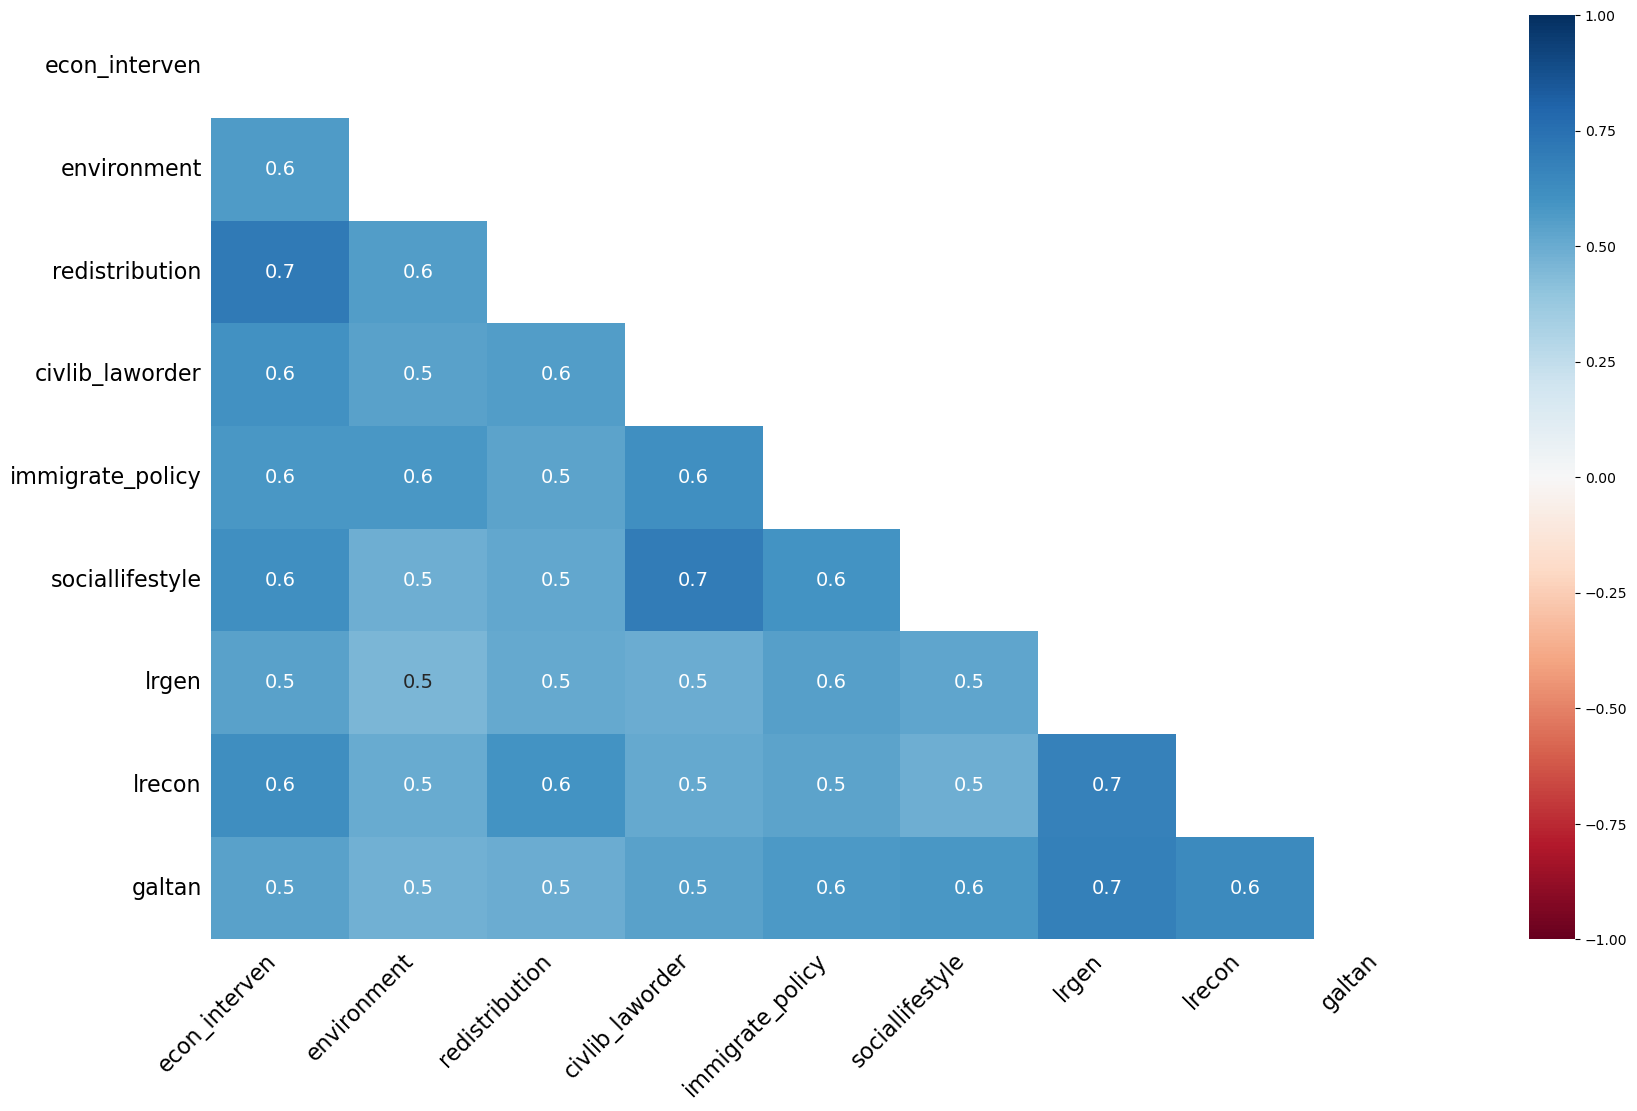

In [49]:
msno.heatmap(CHES2019[relevant_cols])

<AxesSubplot: >

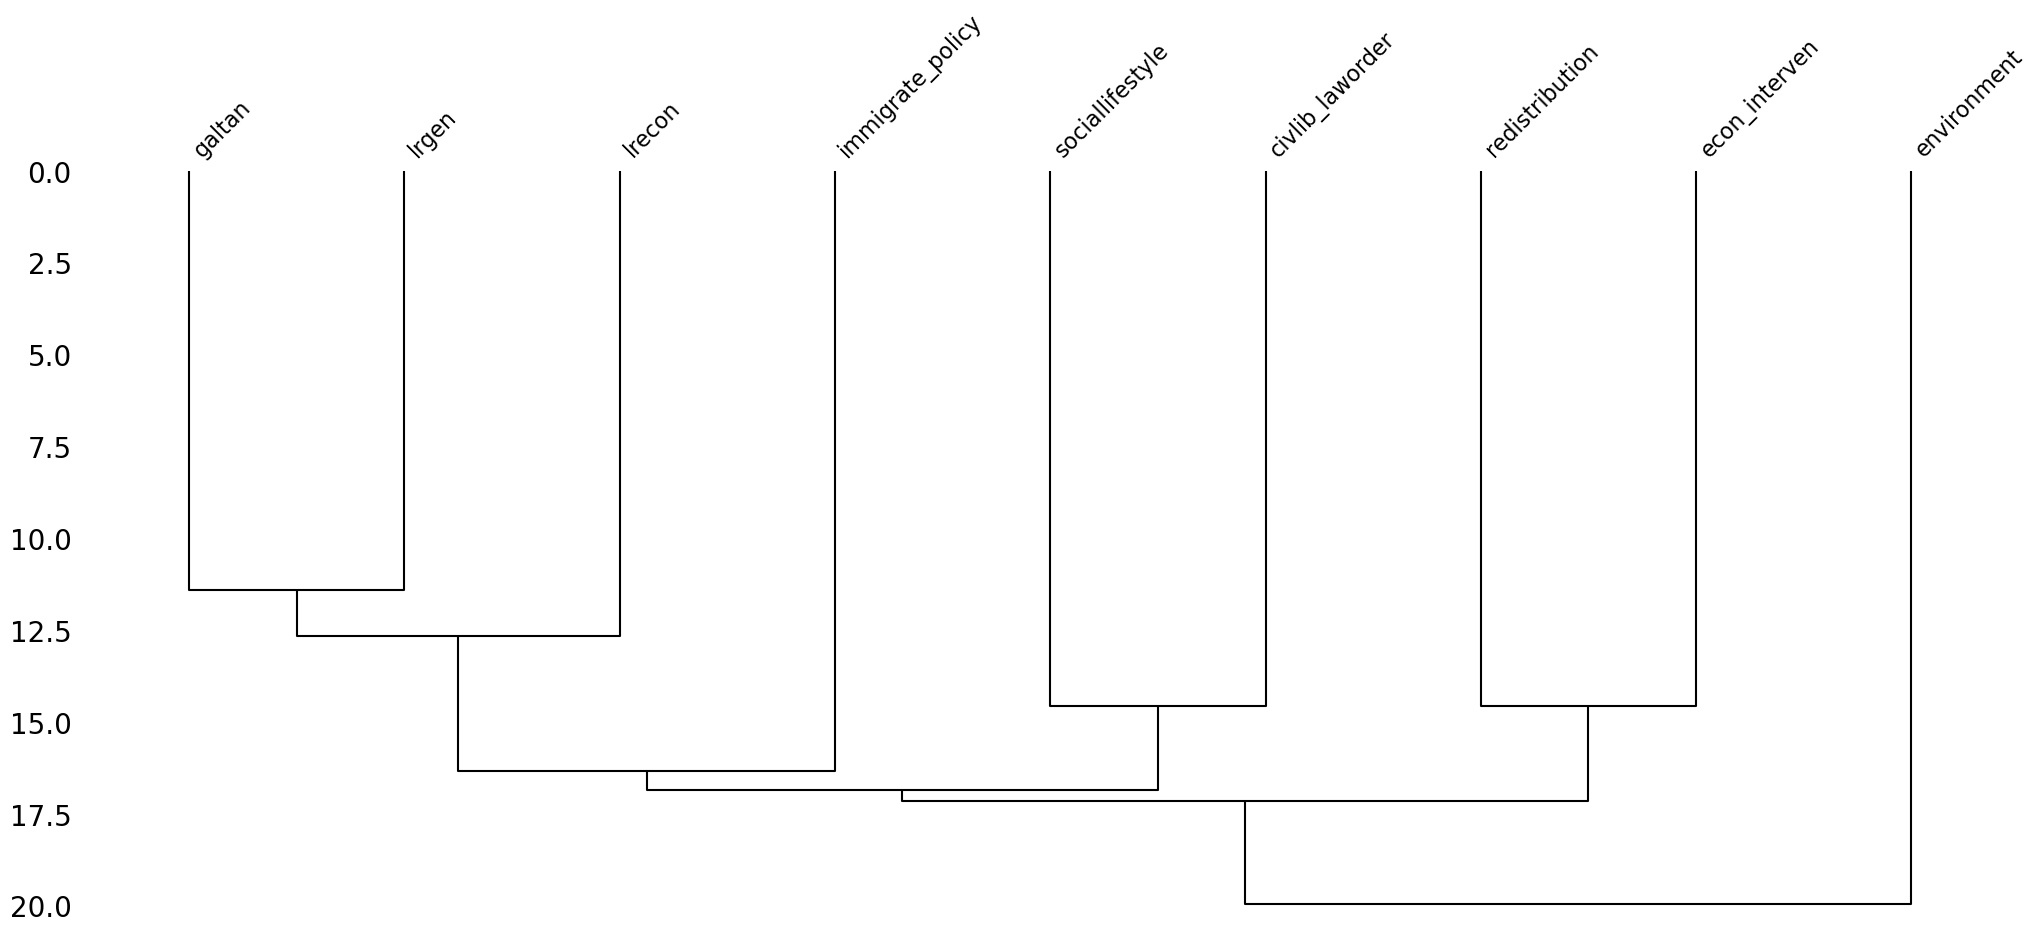

In [50]:
msno.dendrogram(CHES2019[relevant_cols])

<AxesSubplot: >

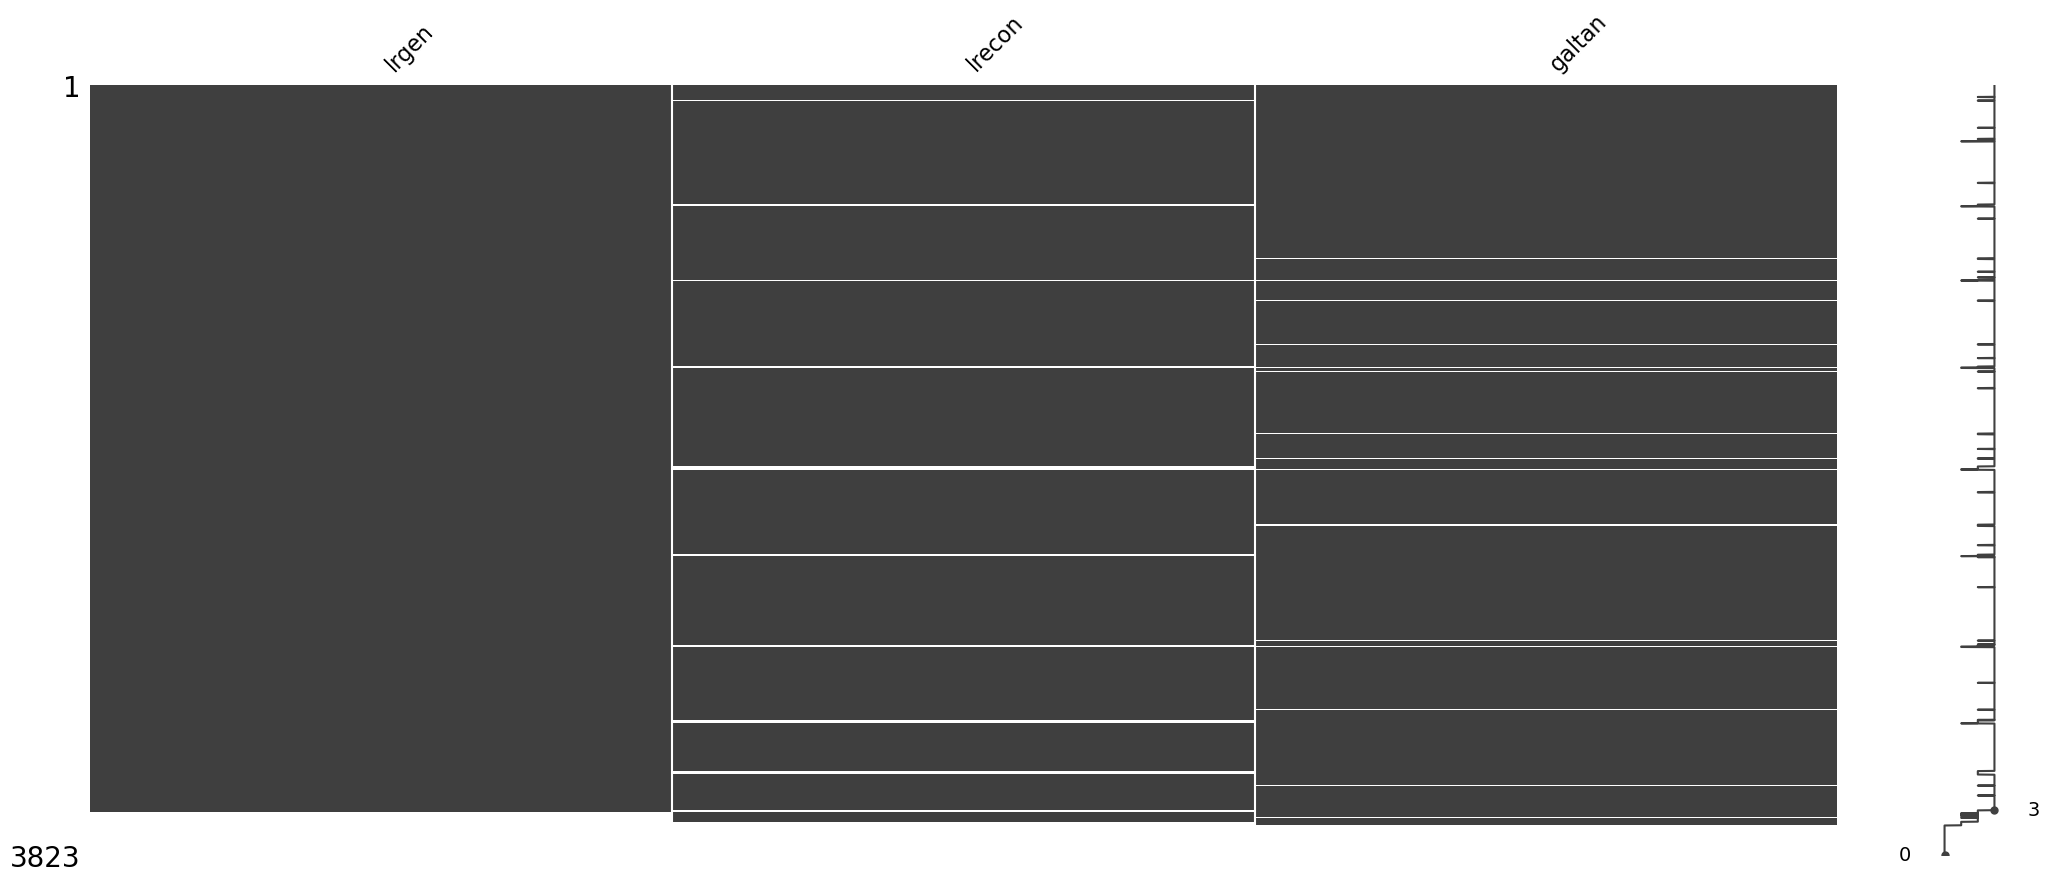

In [51]:
msno.matrix(CHES2019[relevant_cols_dependent].sort_values(by=relevant_cols_dependent))

<AxesSubplot: >

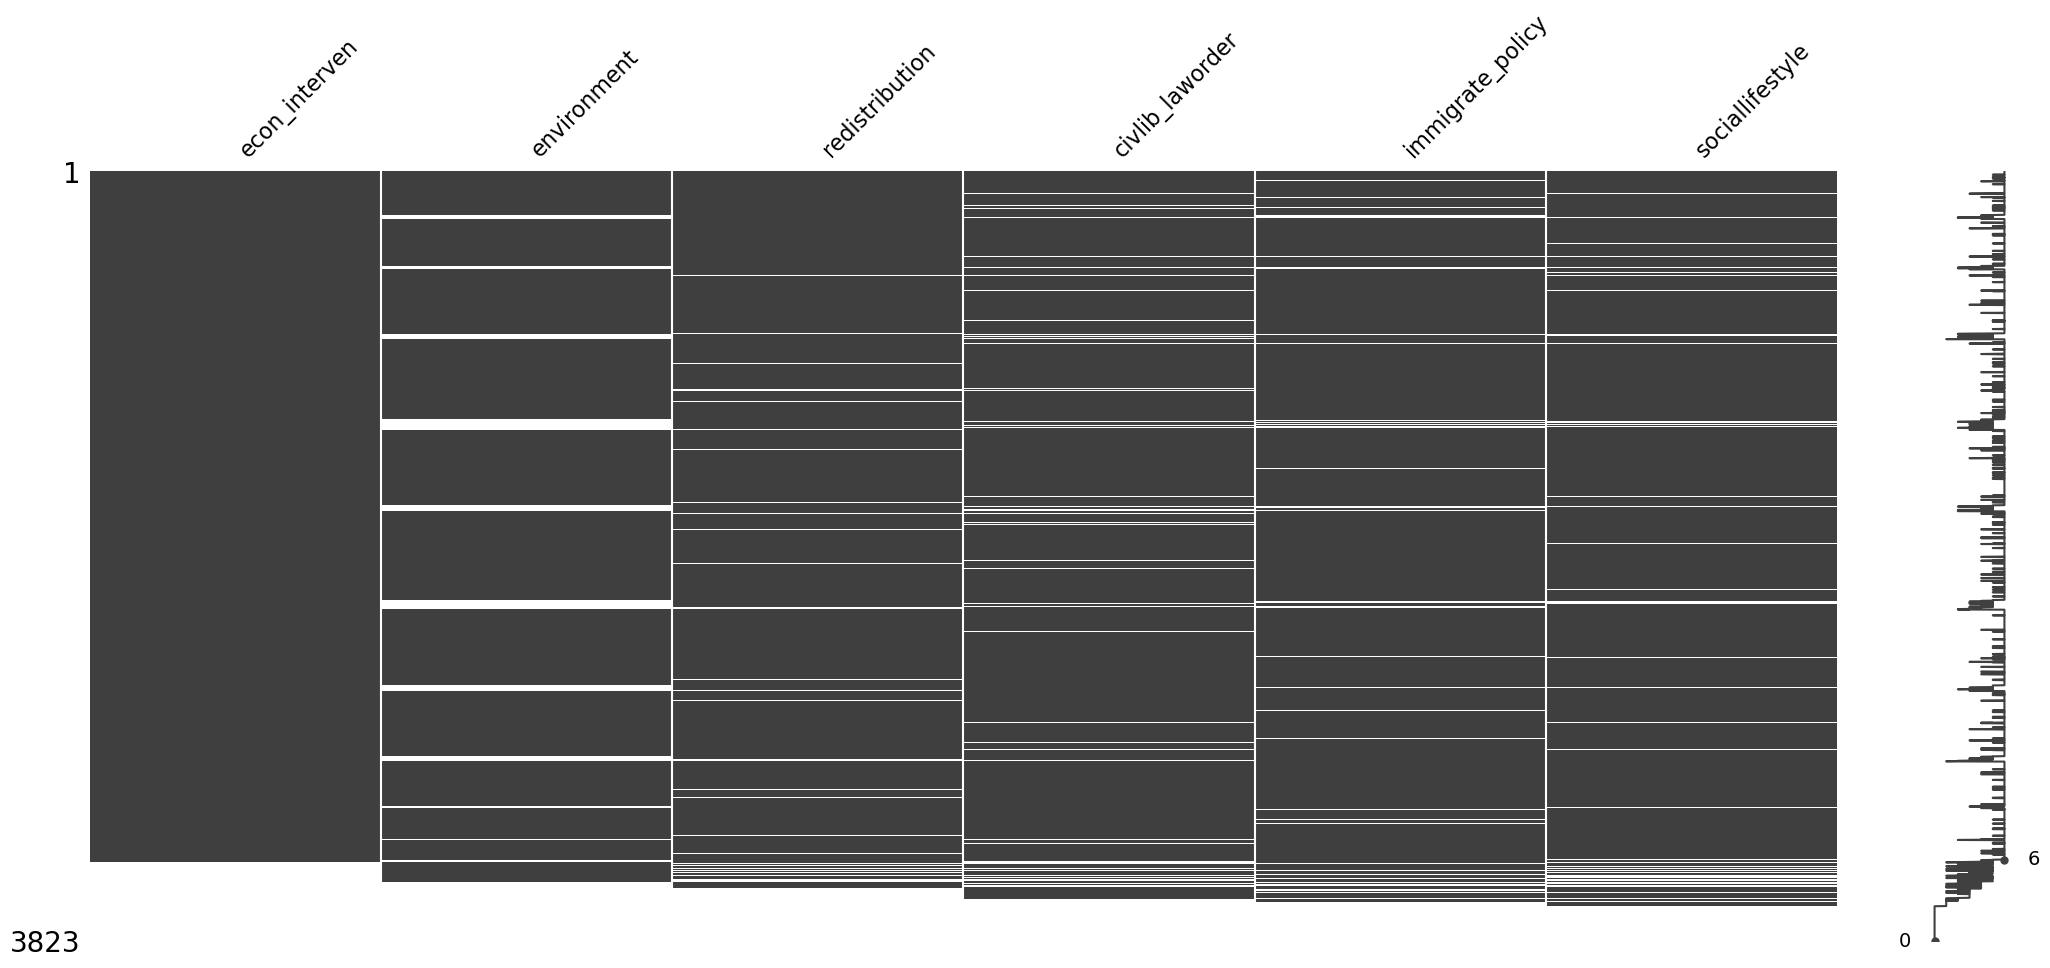

In [52]:
msno.matrix(CHES2019[relevant_cols_independent].sort_values(by=relevant_cols_independent))

In [53]:
CHES2019.columns

Index(['id', 'party', 'party_name', 'party_id', 'position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigra_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_sel

In [54]:
CHES2019[relevant_cols + ['party_id']].isna().sum()

econ_interven       391
environment         561
redistribution      427
civlib_laworder     418
immigrate_policy    385
sociallifestyle     362
lrgen               213
lrecon              269
galtan              227
party_id              0
dtype: int64

In [55]:
pd.merge(CHES2019[relevant_cols].isna(), CHES2019['party_id'], on=CHES2019.index)

,key_0,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen,lrecon,galtan,party_id
0,0,False,False,False,False,False,False,False,False,False,2010.0
1,1,False,False,False,False,False,False,True,False,False,2003.0
2,2,False,False,False,False,False,False,False,False,False,2004.0
3,3,False,False,False,False,False,False,False,False,False,2017.0
4,4,False,False,False,False,False,False,False,False,False,2014.0
...,...,...,...,...,...,...,...,...,...,...,...
3818,3818,True,True,True,False,False,False,False,True,False,1110.0
3819,3819,False,True,True,True,False,True,False,False,True,1110.0
3820,3820,True,True,True,True,True,True,True,True,True,1110.0
3821,3821,True,True,True,False,True,False,False,False,False,1110.0


In [56]:
relevant_cols

['econ_interven',
 'environment',
 'redistribution',
 'civlib_laworder',
 'immigrate_policy',
 'sociallifestyle',
 'lrgen',
 'lrecon',
 'galtan']

# Detailed histograms

In [76]:
#i = 'econ_interven'

for i in relevant_cols_factor_independent:
    fig = plt.figure(figsize = (16,4))
    plt.suptitle('Relative Distribution of ' + i + ': Single Variable w/o Missing Values vs. Exclusion Threshold $n = 6$')

    #dataA = data_base[(data_base['lrgen'].isnull()==False) & (data_base[i].isnull()==False)][i]
    dataA = data_base[(data_base[i].isnull()==False)][i]
    dataB = data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 6)[i]
    ax = fig.add_subplot(131)
    ax.hist(dataA, edgecolor='black', weights=np.ones_like(dataA) / len(dataA), alpha=0.7, bins=11, rwidth=0.8, color='blue')
    ax.hist(dataB, edgecolor='black', weights=np.ones_like(dataB) / len(dataB), alpha=0.7, bins=11, rwidth=0.8, color='orange')
    plt.title('LRGEN')
    

    #dataA = data_base[(data_base['lrecon'].isnull()==False) & (data_base[i].isnull()==False)][i]
    dataA = data_base[(data_base[i].isnull()==False)][i]
    dataB = data_lrecon.dropna(subset = data_lrecon.iloc[:,:-1].columns.values,thresh = 6)[i]
    ax = fig.add_subplot(132)
    ax.hist(dataA, edgecolor='black', weights=np.ones_like(dataA) / len(dataA), alpha=0.7, bins=11, rwidth=0.8, color='blue')
    ax.hist(dataB, edgecolor='black', weights=np.ones_like(dataB) / len(dataB), alpha=0.7, bins=11, rwidth=0.8, color='orange')
    plt.title('LRECON')

    #dataA = data_base[(data_base['galtan'].isnull()==False) & (data_base[i].isnull()==False)][i]
    dataA = data_base[(data_base[i].isnull()==False)][i]
    dataB = data_galtan.dropna(subset = data_galtan.iloc[:,:-1].columns.values,thresh = 6)[i]
    ax = fig.add_subplot(133)
    ax.hist(dataA, edgecolor='black', weights=np.ones_like(dataA) / len(dataA), alpha=0.7, bins=11, rwidth=0.8, color='blue')
    ax.hist(dataB, edgecolor='black', weights=np.ones_like(dataB) / len(dataB), alpha=0.7, bins=11, rwidth=0.8, color='orange')
    plt.title('GAL-TAN')
    plt.savefig('../pics/rel_distri_missing_values_' + i + '.png', dpi=300)
    plt.close()



In [58]:
dataA

0        5.0
1        8.0
2        5.0
3        5.0
4        8.0
        ... 
3816    10.0
3817     9.0
3818     7.0
3821    10.0
3822    10.0
Name: sociallifestyle, Length: 3461, dtype: float64

# EVS

In [59]:
EVS.head()

,respid,hCountry,countrycode,Q9_ees_numeric,lrgen_selfdescription,econ_interven,redistribution,sociallifestyle,civlib_laworder,immigrate_policy_reversed,...,prediction_lm_lrecon1,prediction_polr_lrecon1,prediction_rf_lrecon1,prediction_rf_lrecon2,prediction_rf_lrecon2_unrounded,prediction_lm_galtan1,prediction_polr_galtan1,prediction_rf_galtan1,prediction_rf_galtan2,prediction_rf_galtan2_unrounded
0,7762,1,1040,NaN,3.0,5.0,3.0,0.0,3.0,5.0,...,4.0,4.0,5.0,5.0,4.663037,2.0,3.0,0.0,2.0,2.306471
1,7801,1,1040,1040600.0,4.0,6.0,4.0,0.0,2.0,7.0,...,5.0,5.0,6.0,6.0,5.762113,1.0,2.0,0.0,1.0,1.333388
2,7904,1,1040,NaN,3.0,4.0,5.0,0.0,4.0,4.0,...,4.0,5.0,5.0,5.0,4.666921,3.0,5.0,0.0,2.0,2.131756
3,9223,1,1040,NaN,3.0,2.0,4.0,3.0,5.0,6.0,...,3.0,3.0,4.0,4.0,3.696567,4.0,5.0,4.0,4.0,3.793295
4,9338,1,1040,1040320.0,1.0,6.0,0.0,0.0,3.0,10.0,...,3.0,3.0,2.0,3.0,3.235630,1.0,1.0,0.0,1.0,1.068495


In [60]:
EVS.columns

Index(['respid', 'hCountry', 'countrycode', 'Q9_ees_numeric',
       'lrgen_selfdescription', 'econ_interven', 'redistribution',
       'sociallifestyle', 'civlib_laworder', 'immigrate_policy_reversed',
       'environment', 'immigrate_policy', 'econ_interven_factor',
       'environment_factor', 'redistribution_factor', 'civlib_laworder_factor',
       'immigrate_policy_factor', 'sociallifestyle_factor',
       'prediction_lm_lrgen1', 'prediction_lm_lrgen2',
       'prediction_polr_lrgen1', 'prediction_polr_lrgen2',
       'prediction_rf_lrgen1', 'prediction_rf_lrgen2',
       'prediction_rf_lrgen2_unrounded', 'prediction_lm_lrecon1',
       'prediction_polr_lrecon1', 'prediction_rf_lrecon1',
       'prediction_rf_lrecon2', 'prediction_rf_lrecon2_unrounded',
       'prediction_lm_galtan1', 'prediction_polr_galtan1',
       'prediction_rf_galtan1', 'prediction_rf_galtan2',
       'prediction_rf_galtan2_unrounded'],
      dtype='object')

In [61]:
EVS[relevant_cols_EVS].describe().round(2).to_latex('descr_stat_EVS.tex')

/tmp/ipykernel_3652/4068697467.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  EVS[relevant_cols_EVS].describe().round(2).to_latex('descr_stat_EVS.tex')


In [62]:
EVS[relevant_cols_EVS]

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription,respid,hCountry,countrycode
0,5.0,2.0,3.0,3.0,5.0,0.0,3.0,7762,1,1040
1,6.0,4.0,4.0,2.0,3.0,0.0,4.0,7801,1,1040
2,4.0,0.0,5.0,4.0,6.0,0.0,3.0,7904,1,1040
3,2.0,1.0,4.0,5.0,4.0,3.0,3.0,9223,1,1040
4,6.0,0.0,0.0,3.0,0.0,0.0,1.0,9338,1,1040
...,...,...,...,...,...,...,...,...,...,...
26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0,49108,28,1826
26534,NaN,NaN,0.0,NaN,NaN,NaN,5.0,49112,28,1826
26535,5.0,3.0,5.0,4.0,4.0,8.0,5.0,49114,28,1826
26536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49115,28,1826


In [68]:
EVS[relevant_cols_EVS].dropna(subset = EVS[relevant_cols_EVS].iloc[:,:-3].columns.values,thresh = 7).iloc[:,:-3].describe().round(2).to_latex('descr_stat_EVS_without_nans.tex')

/tmp/ipykernel_3652/2603501465.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  EVS[relevant_cols_EVS].dropna(subset = EVS[relevant_cols_EVS].iloc[:,:-3].columns.values,thresh = 7).iloc[:,:-3].describe().round(2).to_latex('descr_stat_EVS_without_nans.tex')


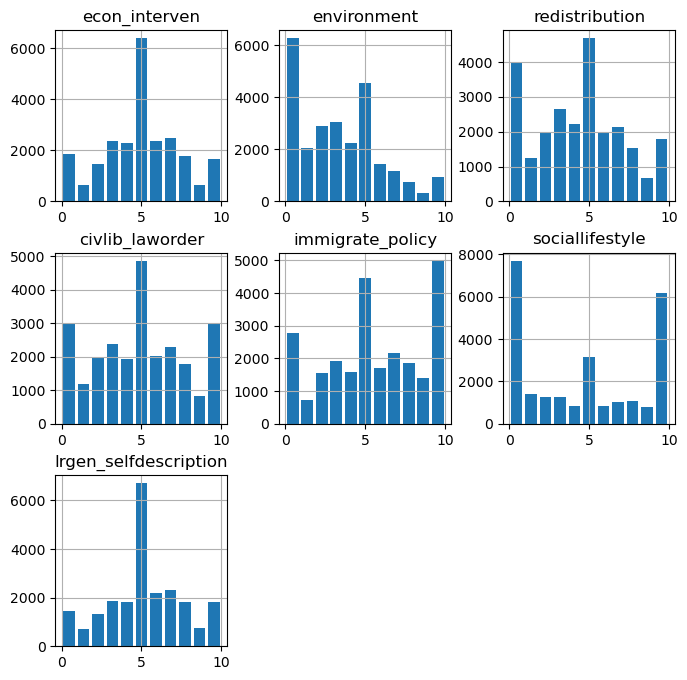

In [71]:
#EVS[relevant_cols_EVS].dropna(subset = EVS[relevant_cols_EVS].iloc[:,:-3].columns.values,thresh = 7).iloc[:,:-3].hist(bins = 11, figsize = (8, 8), rwidth = 0.8)
EVS[relevant_cols_EVS].iloc[:,:-3].hist(bins = 11, figsize = (8, 8), rwidth = 0.8)
plt.savefig('/home/gernot/pCloud/University_Graz/Research/Papers/20_Political_Prediction/Data_Analysis/descriptive_statistics/EVS2019_histogram.png', dpi = 300)

In [98]:
#i = 'econ_interven'
data_base = EVS[relevant_cols_EVS].iloc[:,:-3]

fig = plt.figure(figsize = (10,10))
plt.suptitle('Relative Distribution: Single Variable w/o Missing Values vs. Exclusion Threshold $n = 6$')


for idi, i in enumerate(relevant_cols_EVS_independent):
    #dataA = data_base[(data_base['lrgen'].isnull()==False) & (data_base[i].isnull()==False)][i]
    dataA = data_base[(data_base[i].isnull()==False)][i]
    dataB = EVS[relevant_cols_EVS].dropna(subset = EVS[relevant_cols_EVS].iloc[:,:-3].columns.values,thresh = 7)[i]
    #data_lrgen.dropna(subset = data_lrgen.iloc[:,:-1].columns.values,thresh = 6)[i]
    ax = fig.add_subplot(3, 2, idi + 1)
    ax.hist(dataA, edgecolor='black', weights=np.ones_like(dataA) / len(dataA), alpha=0.7, bins=11, rwidth=0.8, color='blue')
    ax.hist(dataB, edgecolor='black', weights=np.ones_like(dataB) / len(dataB), alpha=0.7, bins=11, rwidth=0.8, color='orange')
    plt.title(i)

plt.savefig('../pics/rel_distri_missing_values_EES.png', dpi=300)
plt.close()



In [77]:
EVS[relevant_cols_EVS].iloc[:,:-3]

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle,lrgen_selfdescription
0,5.0,2.0,3.0,3.0,5.0,0.0,3.0
1,6.0,4.0,4.0,2.0,3.0,0.0,4.0
2,4.0,0.0,5.0,4.0,6.0,0.0,3.0
3,2.0,1.0,4.0,5.0,4.0,3.0,3.0
4,6.0,0.0,0.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
26533,9.0,2.0,0.0,3.0,0.0,3.0,0.0
26534,NaN,NaN,0.0,NaN,NaN,NaN,5.0
26535,5.0,3.0,5.0,4.0,4.0,8.0,5.0
26536,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
testA = EVS[relevant_cols_EVS].dropna(subset = EVS[relevant_cols_EVS].iloc[:,:-3].columns.values,thresh = 7)
testB = EVS[relevant_cols_EVS]

# check normality of full dataset
temp_data = testB
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))

print('end')
temp_data = testA
# check normality of reduced dataset
temp_data = data_base[data_base['lrgen_selfdescription'].isnull()==False]
for i in temp_data.columns:
    print(stats.shapiro(temp_data[temp_data[i].isna() == False][i]))
    
for i in testA.columns:
    tA = testA[testA[i].isna()==False][i]
    tB = testB[testB[i].isna()==False][i]
    #tB = sample(list(testB[testB[i].isna()==False][i]), len(tA))
    #print(len(tA), len(tB))
    #print(stats.wilcoxon(tA, tB))
    print(i + ': ' + str(stats.mannwhitneyu(tA, tB)))

/home/gernot/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9594387412071228, pvalue=0.0)
ShapiroResult(statistic=0.9150263071060181, pvalue=0.0)
ShapiroResult(statistic=0.9442400932312012, pvalue=0.0)
ShapiroResult(statistic=0.9444825649261475, pvalue=0.0)
ShapiroResult(statistic=0.9218734502792358, pvalue=0.0)
ShapiroResult(statistic=0.8362718820571899, pvalue=0.0)
ShapiroResult(statistic=0.9555895328521729, pvalue=0.0)
ShapiroResult(statistic=0.45443785190582275, pvalue=0.0)
ShapiroResult(statistic=0.9492607116699219, pvalue=0.0)
ShapiroResult(statistic=0.9412752389907837, pvalue=0.0)
end
ShapiroResult(statistic=0.9618611335754395, pvalue=0.0)
ShapiroResult(statistic=0.9190869927406311, pvalue=0.0)
ShapiroResult(statistic=0.9482160210609436, pvalue=0.0)
ShapiroResult(statistic=0.9474274516105652, pvalue=0.0)
ShapiroResult(statistic=0.9256622791290283, pvalue=0.0)
ShapiroResult(statistic=0.8396808505058289, pvalue=0.0)
ShapiroResult(statistic=0.9555895328521729, pvalue=0.0)
econ_interven: MannwhitneyuResult(statistic

In [102]:
testA = EVS[relevant_cols_EVS].dropna(subset = EVS[relevant_cols_EVS].iloc[:,:-3].columns.values,thresh = 7)
testB = EVS[relevant_cols_EVS]

# check normality of full dataset
temp_data = testB
for i in temp_data.columns:
    print(stats.kstest(temp_data[temp_data[i].isna() == False][i],'norm'))

print('end')
temp_data = testA
# check normality of reduced dataset
temp_data = data_base[data_base['lrgen_selfdescription'].isnull()==False]
for i in temp_data.columns:
    print(stats.kstest(temp_data[temp_data[i].isna() == False][i],'norm'))
    
for i in testA.columns:
    tA = testA[testA[i].isna()==False][i]
    tB = testB[testB[i].isna()==False][i]
    #tB = sample(list(testB[testB[i].isna()==False][i]), len(tA))
    #print(len(tA), len(tB))
    #print(stats.wilcoxon(tA, tB))
    print(i + ': ' + str(stats.mannwhitneyu(tA, tB)))

KstestResult(statistic=0.8732588853349468, pvalue=0.0)
KstestResult(statistic=0.6538830534446418, pvalue=0.0)
KstestResult(statistic=0.7665059004925001, pvalue=0.0)
KstestResult(statistic=0.8108873859061296, pvalue=0.0)
KstestResult(statistic=0.8375030124555781, pvalue=0.0)
KstestResult(statistic=0.6216142731725975, pvalue=0.0)
KstestResult(statistic=0.8829714136577088, pvalue=0.0)
KstestResult(statistic=0.9997799196843858, pvalue=0.0)
KstestResult(statistic=0.9395680532956221, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
end
KstestResult(statistic=0.8781022472200486, pvalue=0.0)
KstestResult(statistic=0.6629273218213798, pvalue=0.0)
KstestResult(statistic=0.7774224854770956, pvalue=0.0)
KstestResult(statistic=0.8144874023353512, pvalue=0.0)
KstestResult(statistic=0.8411282293584441, pvalue=0.0)
KstestResult(statistic=0.6202735409356084, pvalue=0.0)
KstestResult(statistic=0.8829714136577088, pvalue=0.0)
econ_interven: MannwhitneyuResult(statistic=243462482.5, pvalue=0.1984295476